# **IMPORTING THE LIBRARIES**

In [1]:
from tensorflow import keras 

In [2]:
import pandas as pd
import numpy as pn
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from lightgbm import plot_importance
from sklearn.model_selection import learning_curve
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import seaborn as sns
from keras.utils import np_utils
from keras.models import model_from_json


import cv2
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
#from keras.optimizers import  Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
#from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

# **LOADING THE DATASET**

In [3]:
listapixel=[f'pixel_{x}'for x in range(784)]
listapixel= ['target']+listapixel

In [4]:
data= pd.read_csv('A_Z Handwritten Data.csv', names= listapixel)

# EXPLORATORY DATA ANALYSIS

In [250]:
data.tail()

,target,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372449,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372450,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


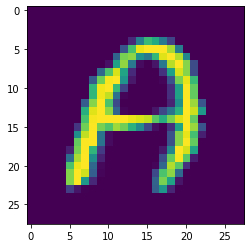

In [6]:
plt.imshow(data.iloc[2,1:].to_numpy().reshape(28,28))

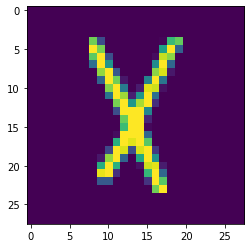

In [945]:
plt.imshow(data.iloc[352340,1:].to_numpy().reshape(28,28))

# DATA PREPARATION


In [411]:
X=data.drop('target', axis=1)
y=data['target']

In [412]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

#X_train = X_train.to_numpy().reshape(X_train.shape[0], 28, 28, 1).astype('float32')
#X_test = X_test.to_numpy().reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [10]:
lgb = LGBMClassifier(max_depth=3, n_estimators=50, colsample_bytree=.33, n_jobs=-1)
lgb.fit(X_train,Y_train)

LGBMClassifier(colsample_bytree=0.33, max_depth=3, n_estimators=50)

<AxesSubplot:>

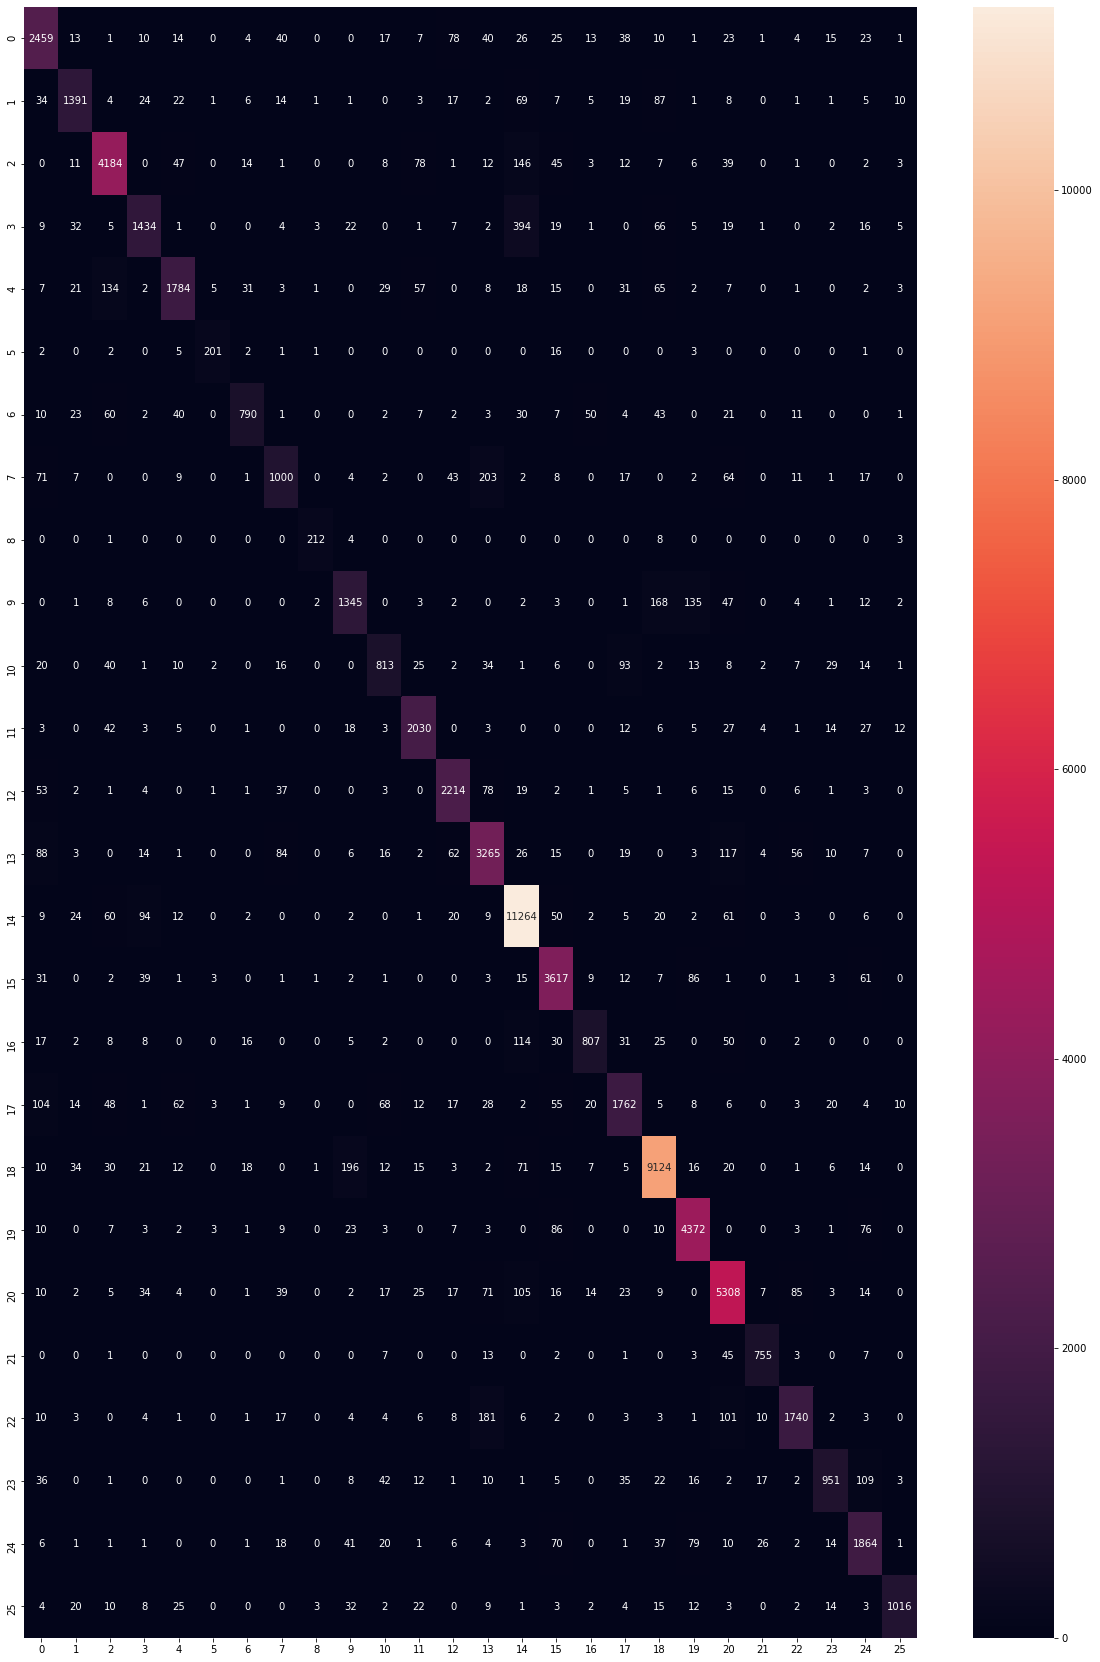

In [11]:
fig, ax = plt.subplots(figsize=(20,30) )
sns.heatmap(confusion_matrix(Y_test,lgb.predict(X_test)), annot= True, fmt='g')

In [42]:
#print(roc_auc_score(Y_train, lgb.predict_proba(X_train)[:, 1],  multi_class='ovr'))

print(roc_auc_score(Y_train, lgb.predict_proba(X_train), multi_class='ovo'))
print(roc_auc_score(Y_test, lgb.predict_proba(X_test), multi_class='ovo'))

0.9940272251818825
0.9932494141960608


# Classification Using CNN

In [458]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train = np.reshape(X_train.values, (X_train.shape[0], 28,28,1))
X_test = np.reshape(X_test.values, (X_test.shape[0], 28,28,1))

#X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)).astype('float32')

X_train=X_train/255
X_test=X_test/255

num_classes = len(y.unique())

y_train=np_utils.to_categorical(y_train, num_classes=num_classes, dtype='int')
y_test=np_utils.to_categorical(y_test, num_classes=num_classes, dtype='int')



# Rodar programa até aqui

In [31]:
model = Sequential()

model.add(Conv2D(filters=30, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Flatten()) # transforma a imagem 28 x 28 em 1D para entrada

model.add(Dense(128,activation ="relu")) #camda ocultacom 128 neuronios
model.add(Dense(64,activation ="relu")) # camada oculta com 64 neuronios
model.add(Dense(32,activation ="relu")) # camada oculta com 32 neuronios

model.add(Dense(num_classes,activation ="softmax", name='predict')) #camada de saída

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy']) # loss é a função de perda devemos diminuir este valor
model.summary()

#history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=18, batch_size=200, verbose=2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 30)        300       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 30)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 30)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5070)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               649088    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)               

In [32]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size =200 )

Epoch 1/10
1490/1490 [==============================] - 75s 50ms/step - loss: 0.2947 - accuracy: 0.9185 - val_loss: 0.1021 - val_accuracy: 0.9710
Epoch 2/10
1490/1490 [==============================] - 80s 53ms/step - loss: 0.0945 - accuracy: 0.9728 - val_loss: 0.0784 - val_accuracy: 0.9776
Epoch 3/10
1490/1490 [==============================] - 84s 56ms/step - loss: 0.0709 - accuracy: 0.9794 - val_loss: 0.0634 - val_accuracy: 0.9823
Epoch 4/10
1490/1490 [==============================] - 88s 59ms/step - loss: 0.0575 - accuracy: 0.9830 - val_loss: 0.0565 - val_accuracy: 0.9841
Epoch 5/10
1490/1490 [==============================] - 89s 59ms/step - loss: 0.0486 - accuracy: 0.9854 - val_loss: 0.0523 - val_accuracy: 0.9850
Epoch 6/10
1490/1490 [==============================] - 87s 59ms/step - loss: 0.0411 - accuracy: 0.9874 - val_loss: 0.0465 - val_accuracy: 0.9867
Epoch 7/10
1490/1490 [==============================] - 87s 58ms/step - loss: 0.0357 - accuracy: 0.9888 - val_loss: 0.0456 -

In [465]:
y_test.argmax(axis=1)

74491

In [468]:
a=loaded_model.predict(X_test).argmax(axis=1)

In [470]:
a.shape

(74491,)

In [ ]:
, labels=list(word_dict.values())

<AxesSubplot:>

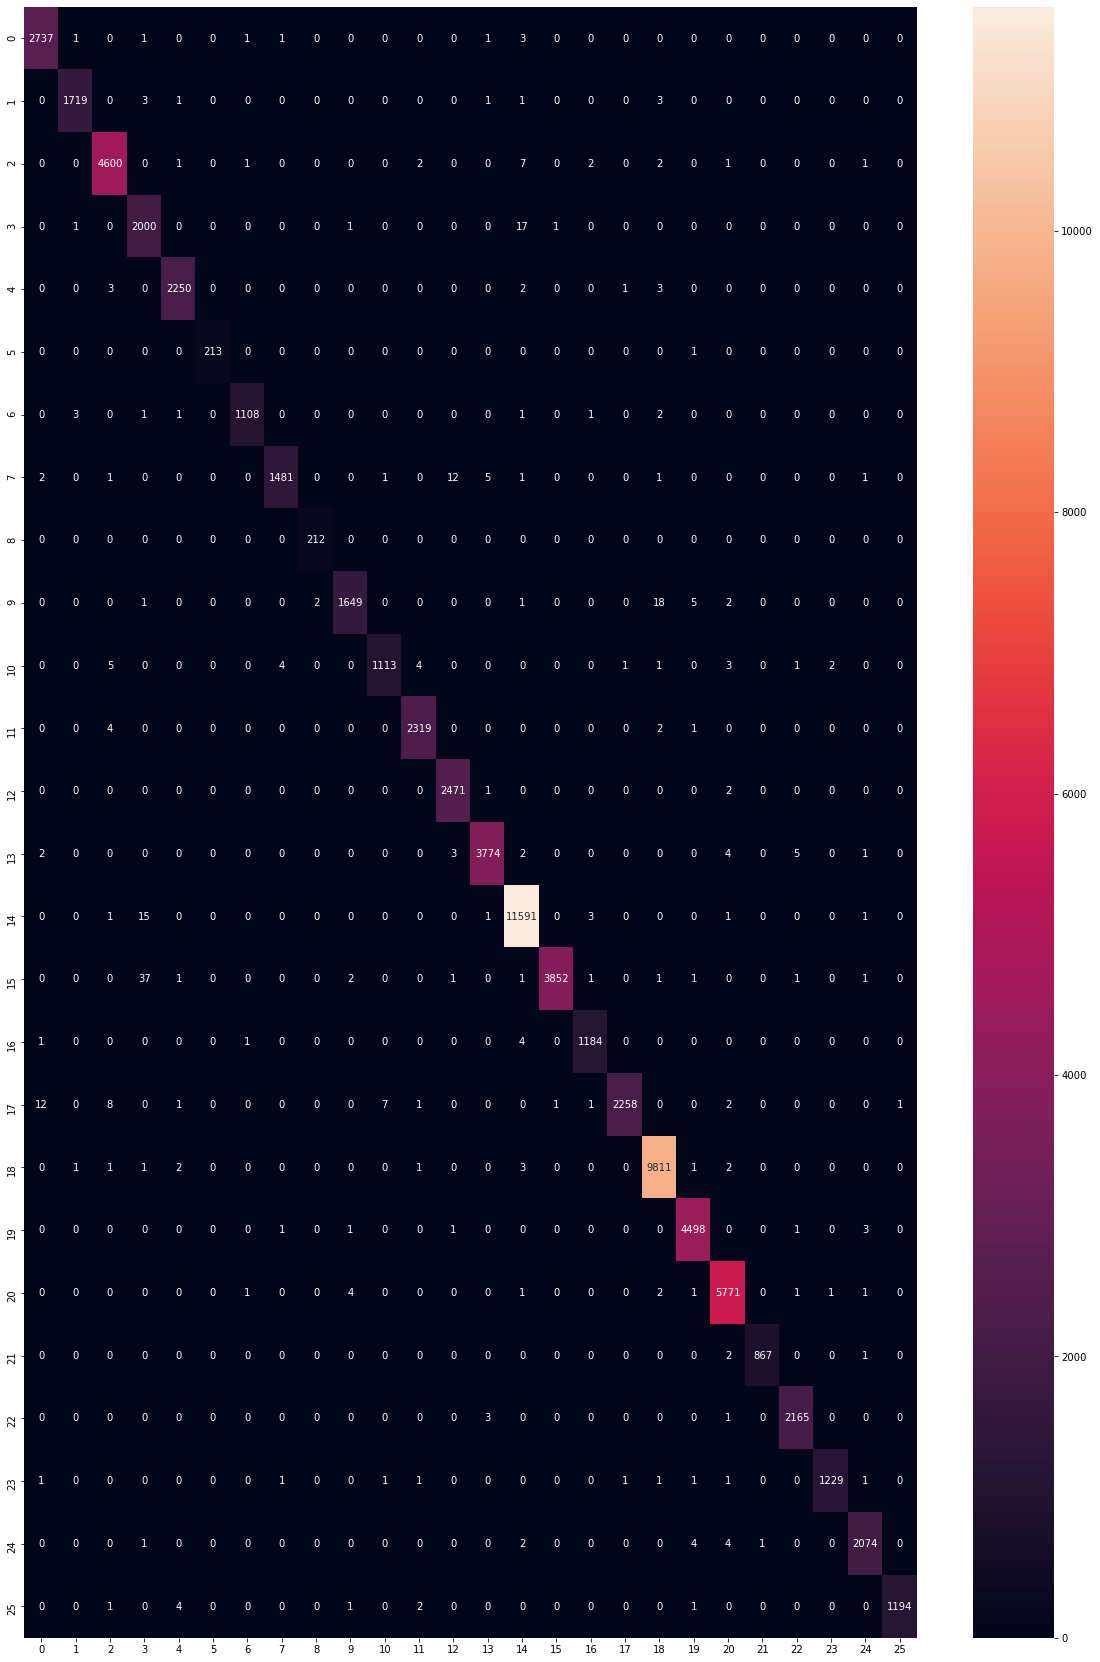

In [472]:
fig, ax = plt.subplots(figsize=(20,30) )
sns.heatmap(confusion_matrix(y_test.argmax(axis=1),loaded_model.predict(X_test).argmax(axis=1)), annot= True, fmt='g')

In [476]:
print(roc_auc_score(y_train.argmax(axis=1), loaded_model.predict(X_train), multi_class='ovo'))
print(roc_auc_score(y_test.argmax(axis=1), loaded_model.predict(X_test), multi_class='ovo'))


0.999975536977967
0.9999778168160506


# Save Model

In [36]:
model_json=model.to_json()
with open ('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('letter.h5')

# Load Model

In [462]:
json_file = open ('model.json', 'r')
loaded_model_json= json_file.read()
json_file.close()

loaded_model= model_from_json(loaded_model_json)
loaded_model.load_weights('letter.h5')

In [463]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [450]:
#perda_teste, acuracia_teste = loaded_model.evaluate(X_test,y_test)

window = Tk()
window.geometry('0x0')     
messagebox.showinfo("information","Escolha o Ficheiro de Excel Onde Estão Os Dados Da Turma")  # dá mensagem para escolher ficheiro excel 
filepath = filedialog.askopenfilename()
window.withdraw()
endereco=filepath.replace('\\', '/')

In [598]:
from PIL import Image, ImageOps, ImageEnhance

In [418]:
#image=Image.open('imagens teste/A.png')
#image.show()

In [944]:
data.loc[data['target']==12]

,target,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
108466,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108467,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108468,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108469,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108470,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120797,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120798,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120799,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120800,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


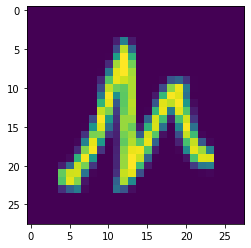

In [952]:
plt.imshow(data.iloc[108470,1:].to_numpy().reshape(28,28))
#plt.imshow(data.iloc[108466,108467:].to_numpy().reshape(28,28))



In [419]:
#image.convert('1')

In [477]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

# Image Enhance

In [1043]:
img = Image.open('imagens teste/N.png').convert('L')  # convert image to 8-bit grayscale
img=ImageEnhance.Brightness(img).enhance(2)
#img=ImageEnhance.Sharpness(img).enhance(0)
img=ImageEnhance.Contrast(img).enhance(10)
img=ImageEnhance.Sharpness(img).enhance(10)
img=ImageOps.invert(img)

img=img.resize((28,28))

WIDTH, HEIGHT = img.size

newdata = list(img.getdata()) # convert image data to a list of integers
# convert that to 2D list (list of lists of integers)
newdata = [newdata[offset:offset+WIDTH]for offset in range(0, WIDTH*HEIGHT, WIDTH)]
newdata=np.array(newdata)

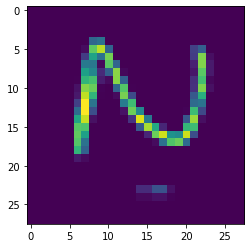

In [1044]:
plt.imshow(newdata.reshape(28,28))

# Model CNN - Predict

In [1045]:
newdata=newdata/255
newdata=newdata.reshape(1,28,28,1)
predict=loaded_model.predict(newdata)
letter=predict.argmax()
print('Letra que foi escrita é: ',word_dict[letter], 'com probabilidade de acertar de: ',"%.2f" % (predict[0][letter]*100),"%")

Letra que foi escrita é:  N com probabilidade de acertar de:  99.91 %


# Model LGBM  - Predict

In [728]:
predict[0][9]

0.002736045

In [1009]:
newdata=newdata.reshape(1,784)
predict=lgb.predict_proba(newdata)
letter=predict.argmax()
print('Letra que foi escrita é: ',word_dict[letter], 'com probabilidade de acertar de: ',"%.2f" % (predict[0][letter]*100),"%")

Letra que foi escrita é:  Y com probabilidade de acertar de:  56.75 %


In [1301]:
from tkinter import *
from PIL import Image, ImageTk, ImageDraw
import PIL


width=400
height=400
white = (255, 255, 255)

def save_picture():
    filename ="image.png"
    image1.save(filename)
    
def paint(event):
    x1,y1=(event.x-0.1),(event.y-0.1)
    x2,y2 = (event.x+0.1), (event.y+0.1)
    canvas.create_oval(x1,y1,x2,y2, fill='black', width=5)
    draw.line([x1,y1,x2,y2], fill='black',width=5)

app = Tk()
canvas = Canvas(app, width=width, height=height, bg='white')
canvas.pack()



image1=PIL.Image.new('RGB', (width, height), white)
draw=ImageDraw.Draw(image1)

canvas.pack(expand=YES, fill=BOTH)

canvas.bind("<B1-Motion>", paint)


button = tk.Button(
    text="Save Picture!",
    width=25,
    height=5,
    bg="blue",
    fg="yellow",
    command=save_picture
)


button.pack()

app.mainloop()



In [1302]:
img = Image.open('image.png').convert('L')  # convert image to 8-bit grayscale
img=ImageEnhance.Brightness(img).enhance(0.9)
#img=ImageEnhance.Sharpness(img).enhance(0)
img=ImageEnhance.Contrast(img).enhance(20)
img=ImageEnhance.Sharpness(img).enhance(20)
img=ImageOps.invert(img)

img=img.resize((28,28))

WIDTH, HEIGHT = img.size

newdata = list(img.getdata()) # convert image data to a list of integers
# convert that to 2D list (list of lists of integers)
newdata = [newdata[offset:offset+WIDTH]for offset in range(0, WIDTH*HEIGHT, WIDTH)]
newdata=np.array(newdata)

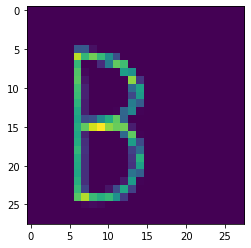

In [1303]:
plt.imshow(newdata.reshape(28,28))

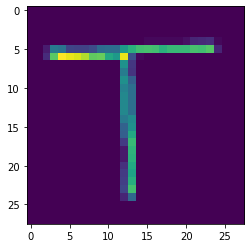

In [1297]:
plt.imshow(newdata.reshape(28,28))

In [1304]:
newdata=newdata/255
newdata=newdata.reshape(1,28,28,1)
predict=loaded_model.predict(newdata)
letter=predict.argmax()
print('Letra que foi escrita é: ',word_dict[letter], 'com probabilidade de acertar de: ',"%.2f" % (predict[0][letter]*100),"%")

Letra que foi escrita é:  Y com probabilidade de acertar de:  24.55 %


In [1099]:
from tkinter import *      
root = Tk()      
canvas = Canvas(root, width = 300, height = 300)      
canvas.pack()      
img = PhotoImage(file="ball.ppm")      
canvas.create_image(20,20, anchor=NW, image=img)      
mainloop()   

TclError: couldn't open "ball.ppm": no such file or directory

In [1098]:
from tkinter import *  
from PIL import ImageTk,Image  
root = Tk()  
canvas = Canvas(root, width = 300, height = 300)  
canvas.pack()  
img = ImageTk.PhotoImage(Image.open("ball.png"))  
canvas.create_image(20, 20, anchor=NW, image=img) 
root.mainloop() 

FileNotFoundError: [Errno 2] No such file or directory: 'ball.png'

In [1057]:
plt.imshow(canvas.reshape(28,28))

AttributeError: 'Canvas' object has no attribute 'reshape'